# Working with Vectors in Sage

## Find the angle and radius of a vector in component form.

In [1]:
from sympy import deg
angle_rad = N(atan(4/3))
angle_deg = N(deg(angle_rad))

# Vector <3,4>, angle
print("For the position vector <3,4>, the angle with the x axis is {0:.2f} radians or {1:.2f} degrees".format(angle_rad, angle_deg))

For the position vector <3,4>, the angle with the x axis is 0.93 radians or 53.13 degrees


In [2]:
# For the radius, simply use the pythagorean theorem: works for 

r = sqrt(3**2 + 4**2)
print("The radius of the position vector <3, 4> is ", r)

The radius of the position vector <3, 4> is  5


Try a problem (Moer 11.1, Question 5)

Given a vector $\vec{u} = \langle 2, -2\rangle$, find the magnitude and the angle (in radians):

Magnitude is $\sqrt{2^2 + 2^2} = \sqrt{8} = 2 \sqrt{2}$  $\tan\theta = \frac{b}{a} = \tan-\frac{2}{2}$

Angle = $\frac{7pi}{4}$

And Moer says we're good!

-1/4*pi


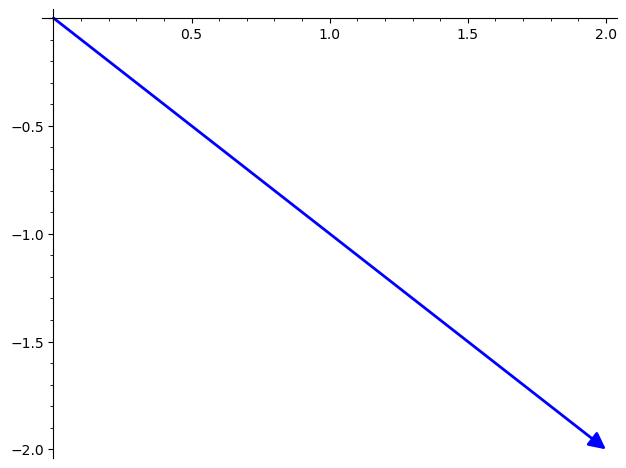

In [3]:
# No help!
print(atan(-1))

# plot it -- better!
v1 = vector((2, -2))
plot(v1)

# From "polar form to component form

Given a vector $\vec{v}$ with an magnititude $\|\vec{v}\|$ making an angle $\theta$ with the positive x axis, then:

$$
\begin{align}
\boldsymbol{\vec{v} = \langle\|\vec{v}\|\cos\theta, |\vec{v}\|\sin\theta\rangle = |\vec{v}\| \langle\cos\theta, \sin\theta\rangle}
\end{align}
$$

Here let's work a problem with that, Moer #11.1, Question 4

A vector with magnitude 10 points in a direction 340 degrees counterclockwise from the positive x axis.

In [4]:
# Get degrees in radians:
from sympy import rad
angle = rad(340)
print(angle)
horiz = round((N(cos(angle)) * 10), 2)
vert = round((N(sin(angle)) * 10), 2)
print("Answer is <{0}, {1}>".format(horiz, vert))


17/9*pi
Answer is <9.4, -3.42>


Check if it makes sense visually (spoiler alert, Moer marked it correct).

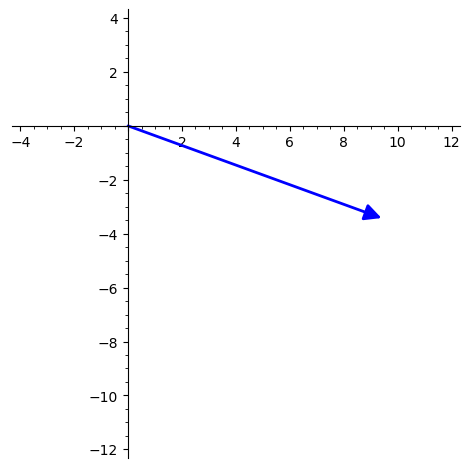

In [5]:
p = plot(vector((horiz, vert)))
p.show(aspect_ratio=1, xmin=-4, xmax=12, ymin=-12, ymax=4)

# Finding unit vector in a given direction

Given a vector $\vec{v} = \langle u,v \rangle$

1. Find the magnitiude, $\|\vec{v}\|$
2. Then find our new vector with scalar multiplication: vector $\vec{u} =  \frac{1}{\|\vec{v}\|} \cdot \vec{v}$


In [6]:
# Do Moer 11.1 Q8:  
# Find the unit vector in the direction of <−4, 2>
# My answer differed from what I found by hand, but only because of 
# Sage moving the radical to the numerator.

v1 = vector((-4,2))
print("Terms:  ", v1[0],  v1[1])
magnitude = sqrt((v1[0])**2 + (v1[1])**2)
print(magnitude)
inverse = 1/magnitude
print(inverse)
v2 = inverse * v1
v2


# Check magnitude of result:
v2_mag = sqrt((v2[0])**2 + (v2[1])**2)
print(v2_mag)

# Check answer done by hand
v3 = vector((-2/sqrt(5), 1/sqrt(5)))
v3_mag = sqrt((v3[0])**2 + (v3[1])**2)
print(v3_mag)


Terms:   -4 2
2*sqrt(5)
1/10*sqrt(5)
1
1


### Do Moer 11.1 Q8 by hand  
Find the unit vector in the direction of <−4, 2>

$\sqrt{20} = 2 \sqrt{5}$

$\frac{1}{2 \sqrt{5}} \cdot -4 = \frac{-2}{\sqrt{5}}$ 

$\frac{1}{2 \sqrt{5}} \cdot 2 = \frac{1}{\sqrt{5}}$ 

So the unit vecor is as shown below:

$$
\begin{align}
\langle - \frac{2}{\sqrt{5}}. \frac{1}{\sqrt{5}} \rangle
\end{align}
$$



## Instantiating vectors in Sage, finding dot product and cross product.

In [7]:
V1 = vector([1,2,3])

# Can instantiate using tuple or list, among other iterables.
V10 = vector([1,2,7])
V11 = vector((1,2,7))
print(V10 == V11)

print("Dot product of V1 and V10: ", V1 * V10)
print("Cross product of V1 and V10: ", V1.cross_product(V10))

True
Dot product of V1 and V10:  26
Cross product of V1 and V10:  (8, -4, 0)


In [8]:
# Lets get a simple plot going:
V1 = vector([1,2,3])
V2 = vector([2,0, 4])
origin = point((0,0), color='black', size=30)
pl = plot(V1) + plot(V2) + origin
pl.show(aspect_ratio=1, xmax=10, xmin=-5, ymax=10, ymin=-5, zmax=10, zmin=-5)

Graphics3d Object

In [9]:
# Here we asked Gemini to refine it to exclude the box but get our standard axis lines showing:

# 1. Define your vectors and origin
V1 = vector([1, 2, 3])
V2 = vector([2, 0, 4])
origin_point = point((0, 0, 0), color='black', size=30) # Corrected to 3D

# 2. Create the plots for your vectors
plot_v1 = plot(V1, color='blue', legend_label='V1 = [1, 2, 3]')
plot_v2 = plot(V2, color='red', legend_label='V2 = [2, 0, 4]')

# 3. Define and plot the axes manually
axis_len = 5  # How long to draw the axes
label_offset = 0.3 # How far to put the label from the arrowhead

# Create arrows for X, Y, Z axes
x_axis = arrow((0, 0, 0), (axis_len, 0, 0), color='black', width=1.5)
y_axis = arrow((0, 0, 0), (0, axis_len, 0), color='black', width=1.5)
z_axis = arrow((0, 0, 0), (0, 0, axis_len), color='black', width=1.5)

# Create 3D text labels for the axes
x_label = text3d("x", (axis_len + label_offset, 0, 0), color='black', fontsize=14)
y_label = text3d("y", (0, axis_len + label_offset, 0), color='black', fontsize=14)
z_label = text3d("z", (0, 0, axis_len + label_offset), color='black', fontsize=14)

# 4. Combine all the plot objects
pl = plot_v1 + plot_v2 + origin_point + x_axis + y_axis + z_axis + x_label + y_label + z_label

# 5. Show the final plot
#    The key is frame=False
pl.show(frame=False, aspect_ratio=1)

Graphics3d Object

In [10]:
# Or refinied again:
# 1. Define your vectors
V1 = vector([1, 2, 3])
V2 = vector([2, 0, 4])
origin_point = point((0, 0, 0), color='black', size=30)

# 2. Calculate vector lengths for labels
len_v1 = V1.norm().n(digits=3)  # Get numerical approximation
len_v2 = V2.norm().n(digits=3)

# 3. Create vector plots (now with thickness and new labels)
plot_v1 = plot(V1, color='blue', width=4, 
               legend_label=f'V1 = [1, 2, 3] (Length: {len_v1})')
plot_v2 = plot(V2, color='red', width=4, 
               legend_label=f'V2 = [2, 0, 4] (Length: {len_v2})')

# 4. Define and plot the axes
axis_len = 5       # How long to draw the axes
label_offset = 0.3 # How far to put the 'x, y, z' label

x_axis = arrow((0, 0, 0), (axis_len, 0, 0), color='black', width=1.0)
y_axis = arrow((0, 0, 0), (0, axis_len, 0), color='black', width=1.0)
z_axis = arrow((0, 0, 0), (0, 0, axis_len), color='black', width=1.0)

x_label = text3d("x", (axis_len + label_offset, 0, 0), color='black', fontsize=14)
y_label = text3d("y", (0, axis_len + label_offset, 0), color='black', fontsize=14)
z_label = text3d("z", (0, 0, axis_len + label_offset), color='black', fontsize=14)

# 5. --- NEW: Add ticks and number labels ---
tick_offset = 0.3  # How far to put number labels from the axis
tick_size = 15     # Size of the tick mark points

# Use sum() to create a single plot object from a generator
x_ticks = sum(point((i, 0, 0), color='black', size=tick_size) for i in range(1, axis_len + 1))
y_ticks = sum(point((0, i, 0), color='black', size=tick_size) for i in range(1, axis_len + 1))
z_ticks = sum(point((0, 0, i), color='black', size=tick_size) for i in range(1, axis_len + 1))

x_tick_labels = sum(text3d(str(i), (i, -tick_offset, 0), color='black', fontsize=10) for i in range(1, axis_len + 1))
y_tick_labels = sum(text3d(str(i), (tick_offset, i, 0), color='black', fontsize=10) for i in range(1, axis_len + 1))
z_tick_labels = sum(text3d(str(i), (0, tick_offset, i), color='black', fontsize=10) for i in range(1, axis_len + 1))


# 6. Combine ALL the plot objects
pl = plot_v1 + plot_v2 + origin_point
pl += x_axis + y_axis + z_axis + x_label + y_label + z_label
pl += x_ticks + y_ticks + z_ticks
pl += x_tick_labels + y_tick_labels + z_tick_labels

# 7. Show the final plot
pl.show(frame=False, aspect_ratio=1)


Graphics3d Object

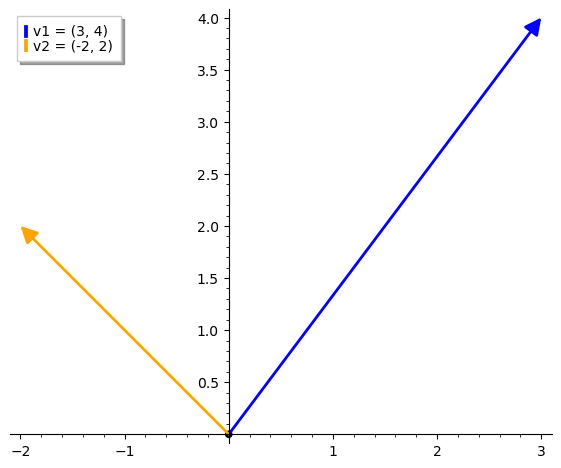

In [11]:
# Another example (thanks to Gemini):

# 1. Define vectors
v1 = vector([3, 4])
v2 = vector([-2, 2])

# 2. Create plot objects for each vector
p_v1 = plot(v1, color='blue', legend_label='v1 = (3, 4)')
p_v2 = plot(v2, color='orange', legend_label='v2 = (-2, 2)')

# 3. Add an origin point
origin = point((0,0), color='black', size=30)

# 4. Combine and show
# (aspect_ratio=1 ensures x and y axes are scaled equally)
(p_v1 + p_v2 + origin).show(aspect_ratio=1)

In [12]:
# Solve a problem, 11.1 q9 -- enterered rounded answers in Moer, it's correct!
# A person starts walking from home and walks:
# 4 miles East
# 5 miles Southeast
# 4 miles South
# 3 miles Southwest
# 3 miles East
# Have to find total miles (easy) and displacement vector and ||displacement vector||

southeast = 7*pi/4
southwest = 5*pi/4

# Solve # 11.1 q 9:
v1 = vector((4, 0))
v2 = vector([N(5*cos(southeast)), N(5*sin(southeast))])
v3 = vector((0, -4))
v4 = vector([N(3*cos(southwest)), N(3*sin(southwest))])
v5 = vector((3, 0))

displacement = v1 + v2 + v3 + v4 + v5
print(displacement)
sqrt(displacement[0]**2 + displacement[1]**2)

(8.41421356237310, -9.65685424949238)


12.8083497715031

In [13]:
N((4*sqrt(2)))

5.65685424949238

$\vec{v} = \langle-1,2\rangle\quad\quad\vec{u} = \langle1,1\rangle\quad\quad \vec{u} + \vec{v} = \langle0, 3\rangle$

$\vec{w} = \langle6, -3\rangle$

If a and b are scalars, then $a\vec{u} + b\vec{v} = \vec{w}$ 

So $a \cdot \langle1,1\rangle + b\cdot \langle-1,2\rangle = \langle6, -3\rangle$

So system of equations to solve is: 

$$
\begin{alignat*}{2}
a - b &= 6 \\
a + 2b &= -3
\\
\therefore
\\
a &= b + 6 \\
b + 6 + 2b &= -3\\
3b &= -9\\
b&=\boxed{-3} \\
a&=\boxed{3}
\end{alignat*}
$$


# Magnitude, Distance, Midpoints

Note that the distance formula between two points (x,y,z) and $(x_1, y_1, z_1)$
is effectively the same as the magnitude formula, i.e., 

$\sqrt{(x - x_1)^2 + (y - y_1)^2 + (z - z_1)^2}$

The midpoint formula for the two points would be:

$\langle \frac{x+x_1}{2}, \frac{y+y_1}{2}, \frac{z+z_1}{2}\rangle$

In [14]:
def magnitude_list(l: list):
    """return the Euclidean length of a point specified as a list of scalars"""
    square_sum = 0
    for i in l:
        square_sum += i**2
    return sqrt(square_sum)

# But see the vector.norm() method, which will give you the same thing!

def magnitude(v: vector):
    """return the Euclidean length of a vector"""
    l = v.list()
    return magnitude_list(l)

# Note we could also implement distance between two points 
# doing the subtraction in that fn and calling magnitude_list
# from sympy import Point3D
# p = Point3D([1,2,3])
# print(p)

V = vector((1,2,3))
assert magnitude(V) == sqrt(14)
assert magnitude(V) == V.norm()

## Implicit Plots of 3D Surfaces

For implicit plotting, we used https://c3d.libretexts.org/CalcPlot3D/index.html, selecting "implicit surface" from the dropdown.  This is easier to set up than SageMath.

The cell below is commented out because it throws off Jupyter's scrolling somewhat

In [15]:
# x = var('x')
# y = var('y')
# z = var('z')

# equation = (x-2)**2 + y**2 + z**2 == 36
# implicit_plot3d(equation, (x,-8, 8), (y,-8,8), (z,-8, 8))

In [16]:
# Checking a solution gotten by hand:
a = vector((-3, 3, -2))
b = vector((-1, -4, 2))
a - 2*b

(-1, 11, -6)

In [17]:
# Checking a solution gotten by hand:
a = vector((3, -3, -1))
b = vector((3, -5, -1))
a + 3*b

(12, -18, -4)

## The Dot Product

The dot product gives us information about the angle $\theta$ between two vectors.

$$
\begin{alignat*}{2}
&\vec{V1} \cdot \vec{V2} = 0 &\quad\quad \theta = \frac{pi}{2} \\
&\vec{V1} \cdot \vec{V2} \gt 0 &\quad\quad \theta \lt \frac{pi}{2} \\
&\vec{V1} \cdot \vec{V2} \lt 0 &\quad\quad \theta \gt \frac{pi}{2} \\
\end{alignat*}
$$

The dot product is related to the angle as follows:

$$
\begin{align*}
\vec{v} \cdot \vec{w} &= \|\vec{v}\| \|\vec{w}\| \cos \theta \\ \\
\cos \theta &= \frac{\vec{v} \cdot \vec{w}}{\|\vec{v}\| \|\vec{w}\|}
\end{align*}
$$

In [18]:
N(acos(-35/(10*sqrt(13))))

2.89902877949431

In [19]:
a = vector((4,-1,-3))
b = vector((-5,0,5))
print(a*b)
print(a.norm())
print(b.norm())
print(N(sqrt(26)))
print(N(sqrt(2) * sqrt(13)))
lhs = a*b / (a.norm() * b.norm())
print(lhs)

-35
sqrt(26)
5*sqrt(2)
5.09901951359278
5.09901951359279
-7/52*sqrt(26)*sqrt(2)


In [20]:
print(N(-7/52*sqrt(26)*sqrt(2) ))
print(N(a*b/(10*sqrt(13))))

-0.970725343394151
-0.970725343394151


In [21]:
from sympy import deg
theta_radians = acos(-0.970725343394151)
theta_degrees = (acos(deg(-0.970725343394151)))
print(theta_radians, " approx =  ", theta_degrees)


2.89902877949431  approx =   arccos(-174.730561810947/pi)


In [22]:

origin = point((0,0), color='black', size=30)
pl = plot(a, color="red") + plot(b, color="blue") + origin
pl.show(aspect_ratio=1)

Graphics3d Object

In [23]:
# Checking an answer.  Are these two vectors orthogonal?

a = vector((2, -2, 3))
b = vector((4, -1, -10/3))

print(a * b)

0


## Projection of vectors

A vector projection is a kind of "shadow that one vector casts onto another.  When we want to find the projection of $\vec{b}$ onto $\vec{a}$, we write it as $\text{proj}_{\vec{a}}{\vec{b}}$.

Here is the formula to use:

$$
\begin{align}
\boldsymbol{
\text{proj}_{\vec{w}}\vec{v} = \left( \frac{\vec{v}\cdot\vec{w}}{\|\vec{w}\|^2} \right) 
\vec{w}}
\end{align}
$$

The following problem, (11.4 Question 6), finds the projection $\vec{b}$ onto $\vec{a}$

In [24]:
A = vector((4, 0, -1))
B = vector ((5,0,2))


def get_projection_b_onto_a(b, a):
    """project b onto a"""
    return (b*a)/(a.norm()**2) * a

get_projection_b_onto_a(B, A)

(72/17, 0, -18/17)

11.4 question 7.
Find the angle of intersection, in radians, of two functions that intersect at (-2,3).

The functions are $f(x) = x^2 + 2x + 3$ and $g(x) = -5x - 7$

First, we need to find the derivatives, to get our slopes as something we can represent as vectors.  

$$
\begin{align}
f^{\prime}(x) = 2x + 2 \\
g^{\prime}(x) = -5
\end{align}
$$

Find the slope of tangent line for $f(x)$:


$$
\begin{align}
(y - 3) = -2(x - (-2)) \\
y - 3 = -2x -4 \\
y = -2x - 1 \\
\end{align}
$$

The slope is -2 at $f(x)$ = -2.  (For confirmation, see https://www.desmos.com/calculator/5ftj0x5ccz)

$g(x)$ is linear, so the slope is -5 wherever you go.

Next, per the video, we need to create two vectors, lets call them $\vec{F}$ and $\vec{G}$  We can read these off the graph.  

For $\vec{F}$, we can take (-2,3) to the point (0,-1).  Subtracting we have the position vector, (-2,4)

For vector $\vec{G}$, we can take the points (-2,3) to the points (0, -7).  Subtracting we get a position vector (-2, 10).  

Next, as we documented above, we'll need to use the formula below to find the angle begween the vectors.

$$
\begin{align}
\cos \theta &= \frac{\vec{v} \cdot \vec{w}}{\|\vec{v}\| \|\vec{w}\|}
\end{align}
$$

Earlier, however, we didn't stop to implement that formula in Sage.  Let's do so now, and use it to find our angle between our two vectors, $\vec{F} = (-2,4)$ and $\vec{G} = (-2,10)$


In [25]:
def get_angle_between_vectors(v: vector, w: vector):
    """returns the angle between two vectors in radians."""
    cos_theta = (v*w)/(v.norm() * w.norm())
    return acos(cos_theta)

F = vector((-2, 4))
G = vector((-2, 10))
print("Raw angle:  ", get_angle_between_vectors(F, G))
print("Evaluated:  ", N(get_angle_between_vectors(F, G)))
print("In degree:  ", N(deg((get_angle_between_vectors(F, G)))))

Raw angle:   arccos(11/130*sqrt(26)*sqrt(5))
Evaluated:   0.266252049150925
In degree:   15.2551187030578


## 3D Vector Cross Products

Earlier we used the ```vector.cross_product``` method in Sage to find a cross-product.  Let's review how to do it without sage.  

There is an unmemorizable formula for the vector cross-product, but fortunately, we can also think about it in terms of the determinant of a 3x3 matrix based on a and b.  We use the regular multiplication symbol for the cross-product:

$$
\begin{align}
\vec{a} \times \vec{b} = \det{\begin{vmatrix}
i & j & k \\
a_1 & a_2 & a_3 \\
b_1 & b_2 & b_3 \\
\end{vmatrix}}
= &\left(\det{\begin{vmatrix}
a_2 & a_3 \\
b_2 & b_3 \\
\end{vmatrix}} \cdot i\right)  - \left(\det{\begin{vmatrix}
a_1 & a_3 \\
b_1 & b_3 \\
\end{vmatrix}} \cdot j\right) + 
\left(\det{\begin{vmatrix}
a_1 & a_2 \\
b_1 & b_2 \\
\end{vmatrix}}
\cdot k\right)\\ 
\end{align}
$$

The first thirty-eight minutes or so of [this video](https://www.youtube.com/watch?v=qqfhgStQ-cA) provides a good treatment of the details of how we got that formula in terms of three 2x2 matrices.  

Let's use this method to solve 11.5, question 3, which asks us to find the cross-product $\vec{u} \times \vec{b}$ where:

$\vec{u} = 6i + 9j + 6k$

$\vec{v} = \langle4, -8, 5\rangle$

Solving for

$$
\begin{align}
\det{\begin{vmatrix}
i & j & k \\
6 & 9 & 6 \\
4 & -8 & 5\\
\end{vmatrix}}
\end{align}
$$

gives us:

$$
\begin{align}
& [(45) - (-48)]i - [(30)-(24)]j + [(-48) -(36)]k \\
\\
= &\;\boxed{\langle 93, -6, -84\rangle}
\end{align}
$$

Now, since doing this manually is error-prone as heck, let's check our result using Sage. 


In [26]:
u = vector((6, 9, 6))
v = vector((4, -8, 5))
u.cross_product(v)

(93, -6, -84)

Sure enough, I had a sign error in the middle term, since corrected.

## Some Properties of the Cross Product

1. The cross product is a vector that is orthogonal to both of the original two vectors.  Since they are orthogonal, the dot product will be zero.

In [27]:
u = vector((3, 6, 9))
v = vector((4, -8, -1))
w = u.cross_product(v)

# Show w is orthogonal to both u and v
assert w * u == 0
assert w * v == 0

2. If we consider two vectors as forming two sides of a parallelogram, then the magnitude of the cross product is equal to the area of this parallelogram.  If theta is the angle between them, then we may find this area using the [parallelogram area formula](https://en.wikipedia.org/wiki/Parallelogram)

$$
\begin{align}
|\vec{A}\times\vec{B}| = |\vec{A}| \cdot |\vec{B}| \cdot \sin\theta
\end{align}
$$

In [28]:
# Show that a cross product represents the 
# area of a parallelogram between two vectors.

u = vector((3,6,9))
v = vector((4, -8, -1))
w = u.cross_product(v)

# get_angle_between_vectors defined earlier in this notebook.
theta = get_angle_between_vectors(u, v)
print(w.norm())
print((u.norm() * v.norm() * sin(theta)).simplify())
assert (w.norm() == u.norm() * v.norm() * sin(theta))

9*sqrt(101)


9*sqrt(101)

3. The cross product is "anti-commutative".  That is, if we reverse the order of the vectors, we get the negation of the cross-product.

In [29]:
u = vector((3, 2, 1))
v = vector((4, 3, -1))
assert (u.cross_product(v) == - v.cross_product(u))

In [30]:
u = vector(RR, (3, 2, -4))
v = vector(RR, (-6, 6, -4))
w = vector(RR, (0,-2,-2))

z = u.cross_product(w)
z.norm() * 1/2

7.34846922834953

In [31]:
P = vector((3, 2, -4))
Q = vector((-6, 6, -4))
R = vector((0, -2, -2))

PQ = Q-P
PR = R-P

(PQ.cross_product(PR)).norm() * 1/2

sqrt(673)

PQ = <(-6 -3), (6-4), (-4 -(-4)> = <-9, 4, 0>
PR = <(0 - 3), (-2 -2), (-2) - (-4)> = <-3, -4, 2>

In [32]:
pq = vector(RR, (-9, 2, 0))
pr = vector(RR, (-3, -4, 2))

pq.cross_product(pr).norm()

45.8693797647189

# Triple Scalar Product

This is used to find the volume of a parallepiped (a lopsided cube, i.e., a paralellogram in 3D).

Formally we use $V = | u \cdot (v \times w)|$ (That's an abslolute value -- result will be scalar)


$$
\begin{align}
u \cdot (v \times w) = \begin{vmatrix}
u_1 & u_2 & u3 \\
v_1 & v_2 & v_3 \\
w_1 & w_2 & w_3
\end{vmatrix}
\end{align}
$$

So you'd work it like a 3D determinant cross product.  (The order doesn't matter of the three terms).

In [33]:
a = vector([3, 5, -1])
b = vector([0, 1, 4])
c = vector([2, 3, 1])

In [34]:
a * b.cross_product(c)

9

In [35]:
b * c.cross_product(a)

9

In [36]:
a * c.cross_product(b)

-9

## Finding the equation of a plane given 3 points

11.6 Q 4.  "Find a plane through the points (-8,-5,3), (-4,6,1), (3,4,-2)"

We need to find a normal vector to the plane as a first step.  Let's call these vectors, a, b & c, respectively.  Then:

In [37]:
a = vector(RR, [-8,-5,3])
b = vector(RR, [-4,6,1])
c = vector(RR, [3,4,-2])

bc = c - b
ba = a - b

normal_vector = ba.cross_product(bc)
normal_vector

(37.0000000000000, 2.00000000000000, 85.0000000000000)

Next, we use the Point-Normal equation to find the equation of the plane.

## Equation of a Plane (Point - Normal Form)

The plane containing the point $(x_1, y_1, z_1)$ and having a normal vector $\vec{n} = \langle a, b, c \rangle$ has equation:

$$\boldsymbol{a(x - x_1) + b(y - y_1) + c(z - z_1) = 0}$$

Or a, b, and c terms are given by the components of our normal vector.  Meanwhile, we can use any point in the plane as the terms of our $x_1, y_1, z_1$.  We'll use point b.

Given that, our equation is $37(x - (-4)) + 2(y - 6) + 85(z - 1) = 0$, and simplifying we have $37(x +4) + 2(y - 6) + 85(z - 1) = 0$

[Checking it graphically on Desmos](https://www.desmos.com/3d/fm6wbveeqf), it is correct.





## Finding the intersection of two planes:

In exercise 11.6 question 5, we're asked to find the equation of a line where two planes intersect.  The planes are $-4y\ +\ 5z\ =\ -7$ and $-9x\ -7y\ -4z\ =\ -25$, and they are [graphed here](https://www.desmos.com/3d/qcyywxvipn).  The [associated video](https://moer.maricopa.edu/assessment/watchvid.php?url=http%3A%2F%2Fyoutu.be%2FPlcZDfKv2_Q) tells us to find the normal vector for each plane, and then the cross product of those two normal vectors will give us the direction vector of their intersection.  Then given a point on that vector, we can figure out the equation.

The Point-Normal equation from the last cell means we can read off our normal vector components from the coefficients of each term.  So we have two normal vectors:

$$
\begin{align}
\vec{n_1} &= \langle0, -4, 5\rangle \\
\vec{n_2} &= \langle-9, -7, -4\rangle
\end{align}
$$


Their cross-product (see below), is $\langle51, -45, -36\rangle$

Note we're asked to find a parametric equation based on $x(t) = 51t$  Copying our point normal equation from above, we have:  

$$\boldsymbol{a(x - x_1) + b(y - y_1) + c(z - z_1) = 0}$$

So we want to find three points $P(0, , )$.  For points y and z, we have a system of equations:

$$
\begin{align}
4y + 5z = -7 \\
-7y - 4z = -25
\end{align}
$$

We solve it in a code cell below using Sage.  $y =3, z = 1$ 

Multiplying row two by $\frac{5}{4}$ gives $-\frac{35}{4}y - 5z = - \frac{125}{4}$

Subtracting 



So at this point we have a point, $P$ on the line, and $P = \left(0, 3, 1\right)$ and a direction vector, $\langle51, -45, -36\rangle$

So we have

$$
\begin{align}
x &= 0 + 51t \\
y &= 3 -45t \\
z &= 1 - 36t
\end{align}
$$

In [38]:
# Get the cross product for exercise below:
n1 = vector([0, -4, 5])
n2 = vector([-9, -7, -4])
print(n1.cross_product(n2), n2.cross_product(n1))

(51, -45, -36) (-51, 45, 36)


In [39]:
# Use sage to solve the system of 
M = Matrix(QQ, [[-4, 5], [-7, -4]])
M
V = vector(QQ, [-7, -25])
M.solve_right(V)

(3, 1)

In [40]:
simplify(-174/-20)

87/10